## 보험료 예측 (총 5개 예측 모델 성능 비교)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import os

In [3]:
os.listdir('./DATA/')

['insurance_data.csv']

In [4]:
data = pd.read_csv('./DATA/insurance_data.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### 해당 고객 정보를 통해  charges 예측 모델을 생성하기

In [5]:
print(data.shape)
print(data.info())

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1333 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


### `데이터 전처리 (1) : 중복 제거`

In [6]:
data[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
data.duplicated().sum()

1

In [8]:
# 중복 제거 
data.drop_duplicates(inplace=True, keep='first')
data.reset_index(drop=True)
data.shape

(1337, 7)

### `데이터 전처리 (2) : 결측값 확인`

In [52]:
data.isnull().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
data.isnull().sum()[data.isnull().sum()>0]

bmi    5
dtype: int64

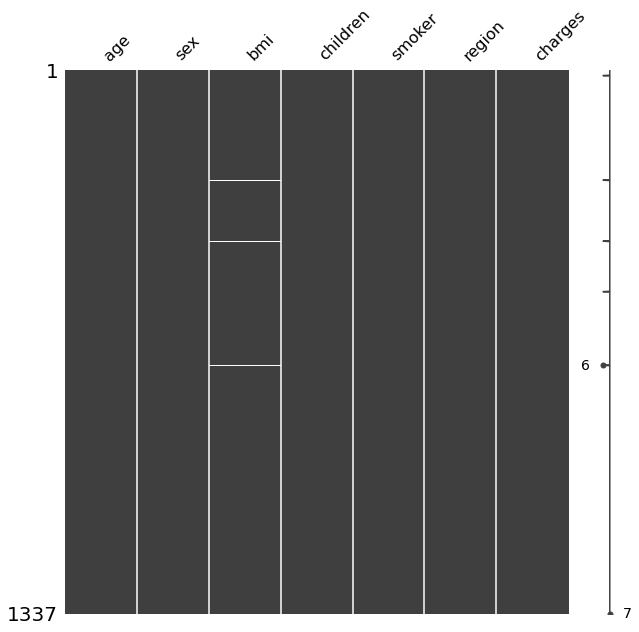

In [55]:
## missingno 패키지를 통한 시각화

missingno.matrix(data, figsize=(10,10))
plt.show()

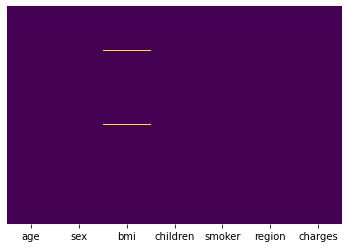

In [60]:
## seaborn 패키지를 통한 시각화

sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

In [65]:
# 결측값이 존재하는 'bmi'컬럼 평균값으로 대체
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

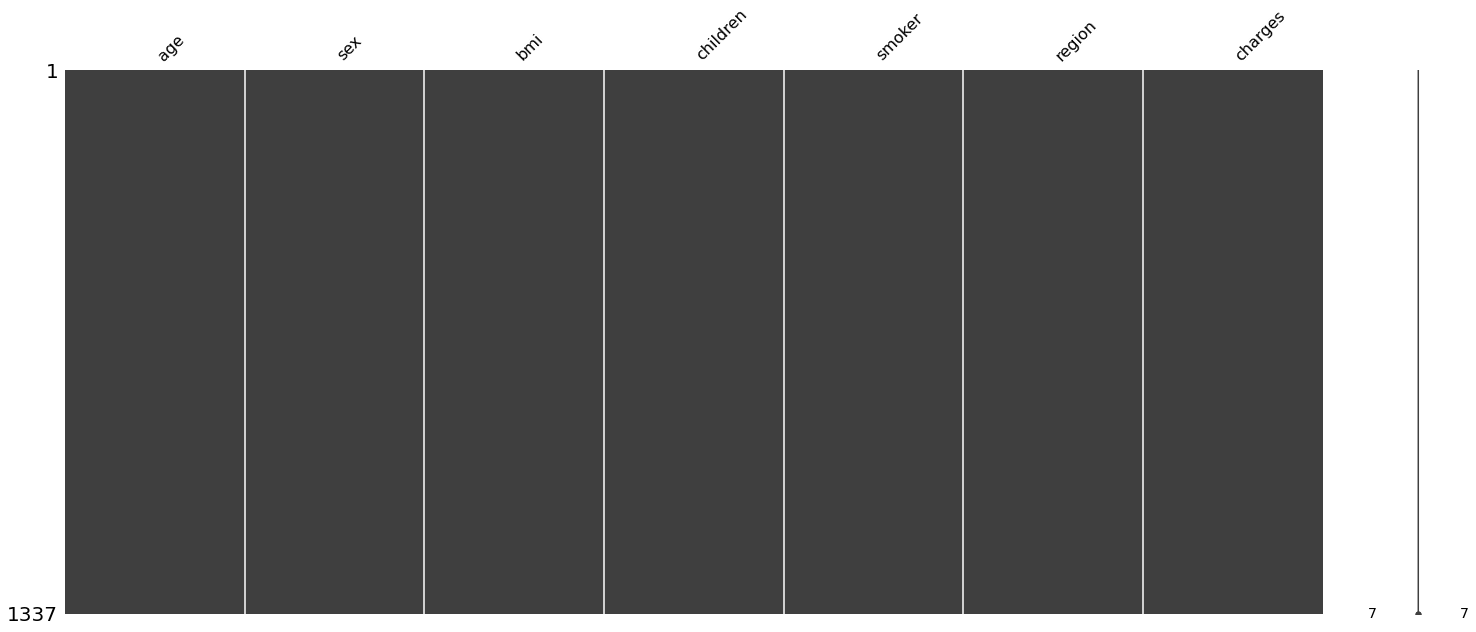

In [67]:
missingno.matrix(data)
plt.show()

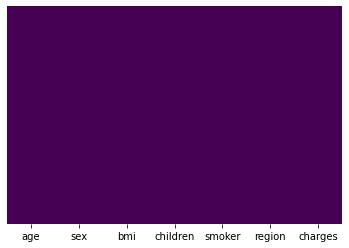

In [71]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

In [75]:
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

### `데이터 전처리 (3) : 이상치 확인`

In [80]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.658596,6.083657,15.9600,26.315,30.4000,34.60000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


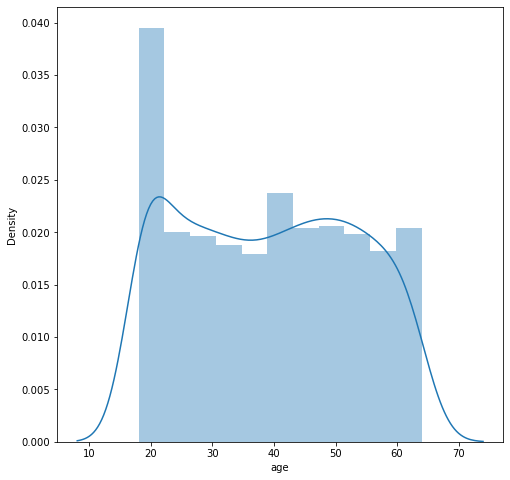

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


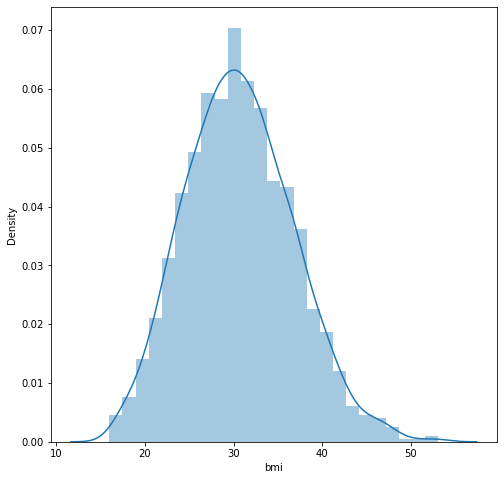

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


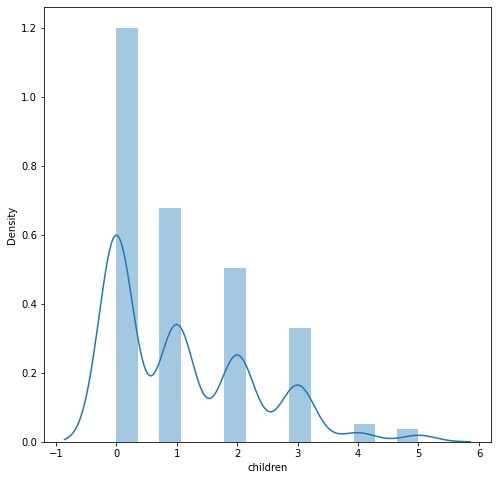

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


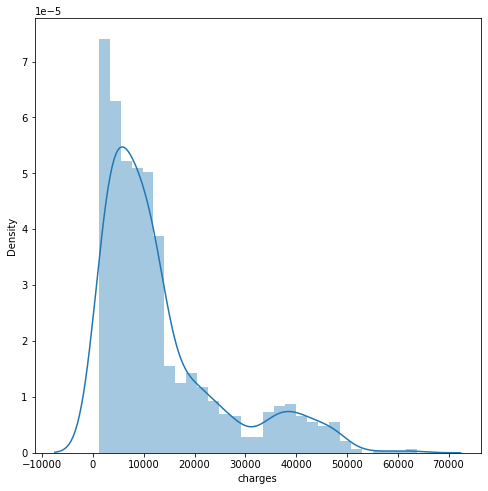

In [94]:
for col in data._get_numeric_data():
    plt.figure(figsize=(8,8))
    fig = sns.distplot(data[col], kde=True)
    plt.show()

### `데이터 확인 (1) : 데이터 타입 별 컬럼 수`

In [18]:
data_dtype = data.dtypes.reset_index()
data_dtype.columns = ['column','columns type']
data_dtype.sort_values(by='columns type').reset_index(drop=True)

,column,columns type
0,age,int64
1,children,int64
2,bmi,float64
3,charges,float64
4,sex,object
5,smoker,object
6,region,object


In [19]:
data_dtype.groupby('columns type').aggregate('count').reset_index()

,columns type,column
0,int64,2
1,float64,2
2,object,3


### `데이터 확인 (2) : 범주형 변수 시각화`

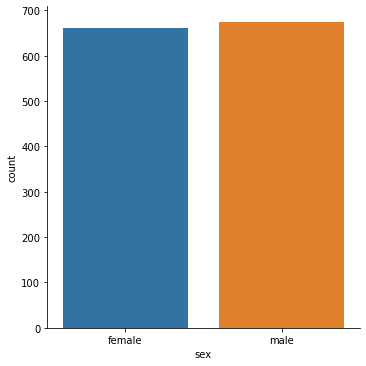

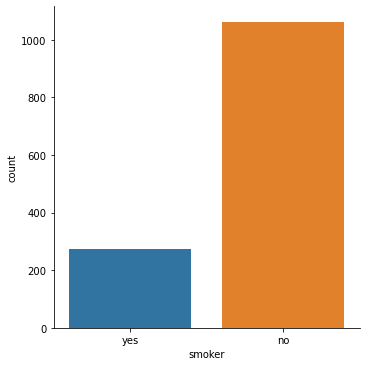

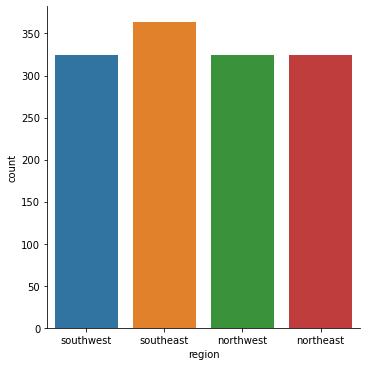

In [26]:
for col in data.select_dtypes(include=['object']).columns:
    fig = sns.catplot(x=col, kind='count', data=data, hue=None)
    fig.set_xticklabels(rotation=0)
    plt.show()

### `데이터 확인 (3) : 범주형 변수 내 Value[범주] 개수`

In [30]:
data.select_dtypes(include=['object']).nunique()

sex       2
smoker    2
region    4
dtype: int64

- sex(성별) 2개
- smoker(흡연여부) 2개
- region(지역) 4개

### `데이터 확인 (4) : 변수 간 상관성`

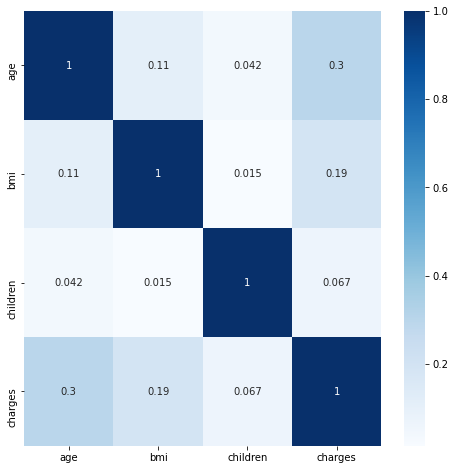

In [104]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),cmap='Blues',annot=True)
plt.show()

### `데이터 확인 (5) : 숫자형 변수 컬럼 간 PairPlot`

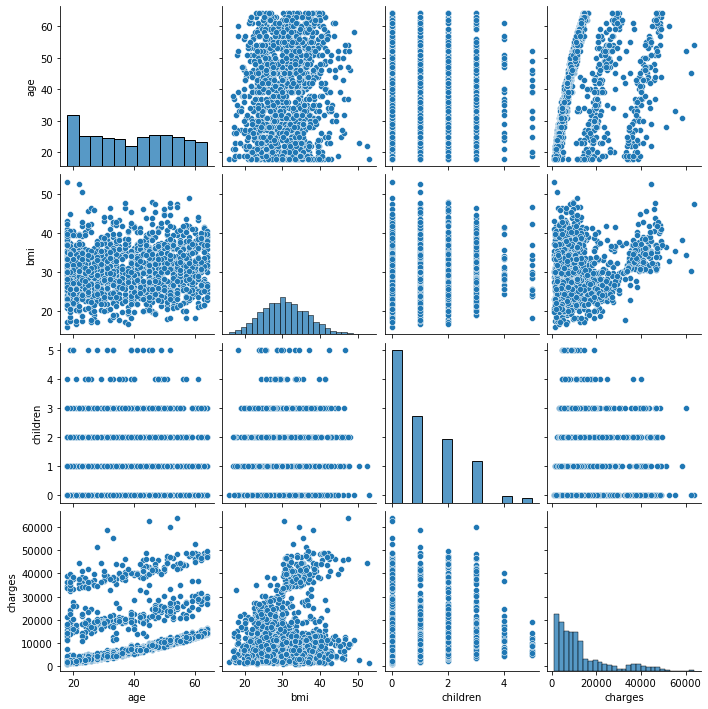

In [106]:
sns.pairplot(data._get_numeric_data())
plt.show()

### `데이터 확인 (6) : 범주형 데이터 추가`

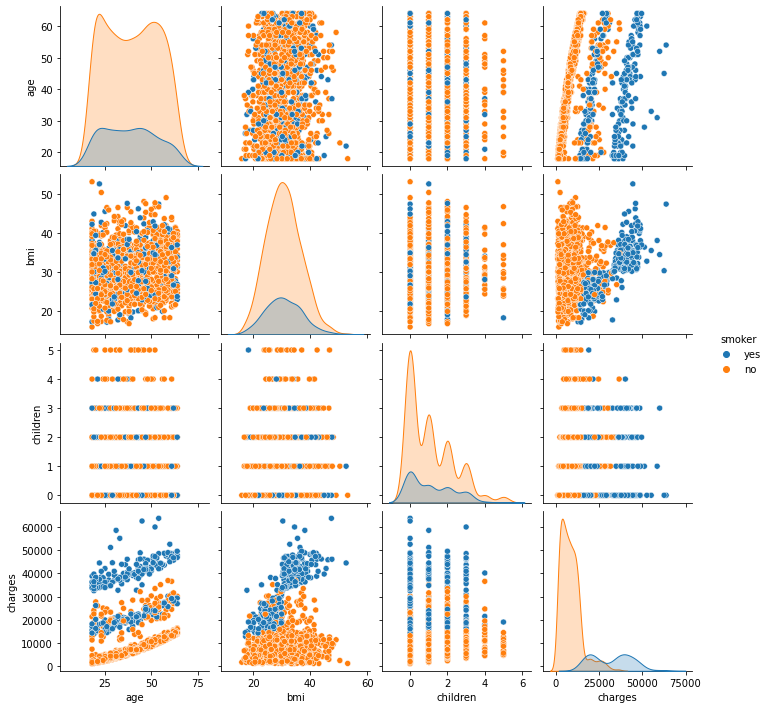

In [108]:
hue = 'smoker'
sns.pairplot(data._get_numeric_data().join(data[[hue]]), hue=hue)
plt.show()

### ` 모델 학습을 위한 전처리 (1) : OneHot Encoding`

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [110]:
cate_col = pd.get_dummies(data[data.select_dtypes(include=['object']).columns.tolist()]).reset_index()
cate_col

,index,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1,0,0,0,1
1,1,0,1,1,0,0,0,1,0
2,2,0,1,1,0,0,0,1,0
3,3,0,1,1,0,0,1,0,0
4,4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1332,1333,0,1,1,0,0,1,0,0
1333,1334,1,0,1,0,1,0,0,0
1334,1335,1,0,1,0,0,0,1,0
1335,1336,1,0,1,0,0,0,0,1


In [111]:
num_col = data._get_numeric_data().reset_index()

In [116]:
df = pd.merge(num_col,cate_col, on='index')
df

,index,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1333,1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1334,1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1335,1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [123]:
del df['index']

## Regression

In [118]:
from sklearn.model_selection import train_test_split

In [127]:
X = df.drop(columns=['charges'])
y = df[['charges']]

In [129]:
X[:10]

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
5,31,25.740,0,1,0,1,0,0,0,1,0
6,46,33.440,1,1,0,1,0,0,0,1,0
7,37,27.740,3,1,0,1,0,0,1,0,0
8,37,29.830,2,0,1,1,0,1,0,0,0
9,60,25.840,0,1,0,1,0,0,1,0,0


In [130]:
y[:10]

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
6,8240.58960
7,7281.50560
8,6406.41070
9,28923.13692


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [174]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(935, 11) (402, 11) (935, 1) (402, 1)


### `Feature Scaling`

In [175]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [176]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test= s_scaler.transform(X_test.astype(np.float))

#### Regression (1) : Linear Regression

In [177]:
from sklearn.linear_model import LinearRegression

In [179]:
# fit model
lr = LinearRegression().fit(X_train,y_train)

# predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Score 확인
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))


lr.coef_: [[ 3.41354001e+03  1.74877841e+03  5.81624918e+02  4.09108487e+14
   4.09108487e+14  1.46388007e+16  1.46388007e+16 -1.82495251e+17
  -1.83343338e+17 -1.90597389e+17 -1.87116115e+17]]
lr.intercept_: [13077.70996271]
lr train score 0.741, lr test score: 0.761


#### Regression (2) : Polynomial Regression

In [181]:
from sklearn.preprocessing import PolynomialFeatures

In [183]:
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y, test_size = 0.33, random_state = 0)

# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

# fit model
poly_lr = LinearRegression().fit(X_train,y_train)

# predict
y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

# Score 확인
print('poly train score %.3f, poly test score: %.3f' % (
poly_lr.score(X_train,y_train),
poly_lr.score(X_test, y_test)))

poly train score 0.848, poly test score: 0.844


#### Regression (3) : Support Vector Regression

In [184]:
from sklearn.svm import SVR

In [185]:
svr = SVR(kernel='linear', C = 300)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0 )

# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

# fit model
svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Score 확인
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))

svr train score 0.672, svr test score: 0.686


#### Regression (4) : RandomForest Regression

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0 )

# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

# fit model
forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Score 확인
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train, y_train),
forest.score(X_test, y_test)))

forest train score 0.975, forest test score: 0.842


#### Regression (5) : Decision Tree Regression

In [189]:
from sklearn.tree import DecisionTreeRegressor

In [190]:

dt = DecisionTreeRegressor(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0 )

# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

# fit model
dt = dt.fit(X_train,y_train.values.ravel())
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Score 확인
print('dt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))

dt train score 0.999, dt test score: 0.671


## `모델 성능 비교`

In [191]:
# 앞에서 만든 regressor 변수들과 라벨을 묶어서 하나의 리스트로 모으기
regressors = [(lr, 'Linear Regression'),
                (poly_lr, 'Polynomial Regression'),
                (svr, 'SupportVector Regression'),
                (forest, 'RandomForest Regression'),
                (dt, 'DecisionTree')]

# 각 regressor 변수들과 라벨 묶음을 차례로 fit -> predict -> score 로 처리해서 보여주기
for reg, label in regressors:
    print(80*'_', '\n')
    reg = reg.fit(X_train,y_train.values.ravel())
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    print(f'{label} train score %.3f, {label} test score: %.3f' % (
    reg.score(X_train,y_train),
    reg.score(X_test, y_test)))

________________________________________________________________________________ 

Linear Regression train score 0.743, Linear Regression test score: 0.758
________________________________________________________________________________ 

Polynomial Regression train score 0.743, Polynomial Regression test score: 0.758
________________________________________________________________________________ 

SupportVector Regression train score 0.672, SupportVector Regression test score: 0.686
________________________________________________________________________________ 

RandomForest Regression train score 0.975, RandomForest Regression test score: 0.842
________________________________________________________________________________ 

DecisionTree train score 0.999, DecisionTree test score: 0.671
